In [2]:
!pip install apyori

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import utils
%matplotlib inline

In [7]:
data=pd.read_csv('accident data.csv')

In [8]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,occupancy type,transitive type,event-event,event-factor,factor-factor,occurrence,...,isolation strategy.1,insurance strategy,domination strategy,reform strategy,hedging strategy,transition strategy,domination strategy.1,neutral strategy,eliminating strategy,pre-assessment strategy
0,traffic accidents,1,Traffic Accident in U.S. Yosemite National Park,traffic accidents,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,traffic accidents,2,Tourist Bus Accident in U.S. Yosemite National...,traffic accidents,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
2,traffic accidents,3,Traffic Accident in London attractions,traffic accidents,1,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
3,traffic accidents,4,Major Tourism Traffic Accidents in Tibet,traffic accidents,0,1,0,0,1,1,...,0,0,1,1,0,1,0,0,0,0
4,traffic accidents,5,"Tourist Bus Riverfall Accident in Jingzhou,China",traffic accidents,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,drowning accidents,71,Drowning of Tourists on Yanzhou Island in Ding...,drowning accidents,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
71,drowning accidents,72,"Drowning Accident in Huangshan Scenic Area, An...",drowning accidents,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
72,social safety accidents,73,Explosion of Simian Buddha Scenic Spot in Bang...,social safety accidents,0,1,0,1,0,1,...,1,1,1,0,0,0,0,0,0,0
73,social safety accidents,74,"Robbers Attacking Tourists in Paris, France",social safety accidents,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
df=data.iloc[:,4:]

In [21]:
df

,occupancy type,transitive type,event-event,event-factor,factor-factor,occurrence,acceleration,aggravation,transformation,excessive type,...,isolation strategy.1,insurance strategy,domination strategy,reform strategy,hedging strategy,transition strategy,domination strategy.1,neutral strategy,eliminating strategy,pre-assessment strategy
0,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,1,0,1,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
3,0,1,0,0,1,1,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
4,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
71,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
72,0,1,0,1,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
73,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


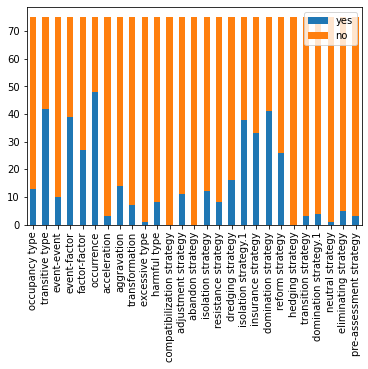

In [22]:
yes=(df==1).sum()
no=(df==0).sum()
accident_data =pd.concat([yes,no],axis=1,keys=['yes','no'])
ax=accident_data.plot.bar(stacked=True)
plt.show()

In [23]:
Rules=list(apriori(df,min_support=0.2,min_confidence=0.2))
associationRules=utils.extract(Rules)
rules_df=pd.DataFrame(associationRules,columns=['LHS','RHS','Support','Confidence','Lift'])
len(rules_df)

254869

In [27]:
frequent_set = apriori(df, min_support = 0.02, use_colnames = True)

In [28]:
frequent_set

<generator object apriori at 0x000002D473061190>

In [30]:
rules_df.nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
14,[],[t],0.962963,0.962963,1.000000
1,[],[a],0.888889,0.888889,1.000000
4,[],[e],0.888889,0.888889,1.000000
12,[],[r],0.888889,0.888889,1.000000
92,[],"[t, a]",0.888889,0.888889,1.000000
93,[a],[t],0.888889,1.000000,1.038462
94,[t],[a],0.888889,0.923077,1.038462
9,[],[n],0.851852,0.851852,1.000000
86,[],"[r, a]",0.851852,0.851852,1.000000
87,[a],[r],0.851852,0.958333,1.078125


In [36]:


from mlxtend.frequent_patterns import association_rules, apriori

ModuleNotFoundError: No module named 'mlxtend'